In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading Data
google_df = pd.read_csv('googleplaystore.csv')
#Displaying first 5 rows of the dataset
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
google_df.shape #Total Rows*Columns in dataset

(10841, 13)

In [4]:
google_df.info() #Generating info about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
google_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


<AxesSubplot:>

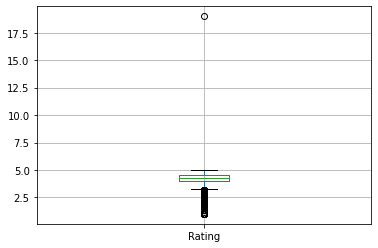

In [7]:
google_df.boxplot() #We can see ratings are generally lying between 2.5-5

# Data Cleaning

In [8]:
google_df.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
google_df.isnull().sum() #Total Null value for each column

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Checking how many ratings are more than 5 (Outliers)

In [12]:
google_df[google_df['Rating'] > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Hence we can see that the above app has a rating of more than 5, so we can remove this record from the dataset

In [13]:
#Droping Record with Index 10472
google_df.drop([10472],inplace=True)


In [15]:
google_df.shape

(10840, 13)

<AxesSubplot:>

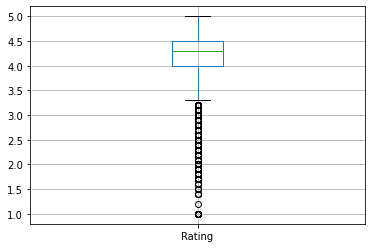

In [17]:
google_df.boxplot() #Hence we can see that our most rating values are between 4 and 5

array([[<AxesSubplot:title={'center':'Rating'}>]], dtype=object)

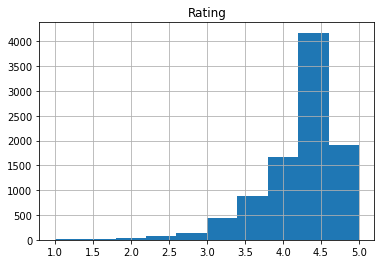

In [19]:
google_df.hist()

In [20]:
#Replacing Null Values with Median of the data ( For non Categorical Columns)
x = google_df['Rating'].median()
google_df['Rating'].fillna(x,inplace = True)
google_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [24]:
#Replacing null values with Mode of the data for Categorical Columns
print((google_df['Type'].mode()))
print(google_df['Current Ver'].mode())
print(google_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


In [25]:
google_df['Type'].fillna((google_df['Type'].mode().values[0]),inplace=True)
google_df['Current Ver'].fillna((google_df['Current Ver'].mode().values[0]),inplace=True)
google_df['Android Ver'].fillna((google_df['Android Ver'].mode().values[0]),inplace=True)

In [26]:
google_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

Hence we have removed all the Null Values in the dataset

In [27]:
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [28]:
google_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  object 
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


# Now we can convert Price,Reviews and Ratings to Numerical Values for better understanding

In [30]:
google_df['Price']

0        0
1        0
2        0
3        0
4        0
        ..
10836    0
10837    0
10838    0
10839    0
10840    0
Name: Price, Length: 10840, dtype: object

In [31]:
google_df['Price'].value_counts()

0          10040
$0.99        148
$2.99        129
$1.99         73
$4.99         72
           ...  
$1.04          1
$109.99        1
$1.50          1
$379.99        1
$89.99         1
Name: Price, Length: 92, dtype: int64

In [32]:
#Now we can remove the '$' sign from the price

google_df['Price'] = google_df['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else str(x))
google_df['Price'].value_counts()

0        10040
0.99       148
2.99       129
1.99        73
4.99        72
         ...  
1.97         1
18.99        1
2.56         1
4.80         1
2.59         1
Name: Price, Length: 92, dtype: int64

In [37]:
google_df['Price'] = google_df['Price'].apply(lambda x:float(x))
type(google_df['Price'][0])

numpy.float64

In [39]:
google_df['Reviews'].value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
19070       1
4288        1
10479       1
295305      1
29229       1
Name: Reviews, Length: 6001, dtype: int64

In [40]:
google_df['Reviews'] = pd.to_numeric(google_df['Reviews'],errors = 'coerce')


In [42]:
google_df['Installs'].value_counts()

1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: Installs, dtype: int64

In [43]:
google_df['Installs'] = google_df['Installs'].apply(lambda x:str(x).replace('+','') if '+' in str(x) else str(x))
google_df['Installs'].value_counts()

1,000,000        1579
10,000,000       1252
100,000          1169
10,000           1054
1,000             907
5,000,000         752
100               719
500,000           539
50,000            479
5,000             477
100,000,000       409
10                386
500               330
50,000,000        289
50                205
5                  82
500,000,000        72
1                  67
1,000,000,000      58
0                  15
Name: Installs, dtype: int64

In [47]:
google_df['Installs'] = google_df['Installs'].apply(lambda x:str(x).replace(',','') if ',' in str(x) else str(x))
google_df['Installs'] = google_df['Installs'].apply(lambda x:float(x))
google_df['Installs'].value_counts()

1.000000e+06    1579
1.000000e+07    1252
1.000000e+05    1169
1.000000e+04    1054
1.000000e+03     907
5.000000e+06     752
1.000000e+02     719
5.000000e+05     539
5.000000e+04     479
5.000000e+03     477
1.000000e+08     409
1.000000e+01     386
5.000000e+02     330
5.000000e+07     289
5.000000e+01     205
5.000000e+00      82
5.000000e+08      72
1.000000e+00      67
1.000000e+09      58
0.000000e+00      15
Name: Installs, dtype: int64

In [49]:
google_df.info() #hence we have changed the data types of PRice,Reviews,Installs

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          10840 non-null  float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  float64
 6   Type            10840 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10840 non-null  object 
 12  Android Ver     10840 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 1.4+ MB


In [50]:
google_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,50000000.0,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [52]:
google_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rating,10840.0,4.206476e+00,4.803420e-01,1.0,4.1,4.3,4.5,5.000000e+00
Reviews,10840.0,4.441529e+05,2.927761e+06,0.0,38.0,2094.0,54775.5,7.815831e+07
Installs,10840.0,1.546434e+07,8.502936e+07,0.0,1000.0,100000.0,5000000.0,1.000000e+09
Price,10840.0,1.027368e+00,1.594970e+01,0.0,0.0,0.0,0.0,4.000000e+02


# DATA VISUALIZATION

In [54]:
category_df = google_df.groupby('Category').agg({'Rating':'mean','Price':'sum','Reviews':'mean'})
category_df

,Rating,Price,Reviews
Category,,,
ART_AND_DESIGN,4.355385,5.97,2.637600e+04
AUTO_AND_VEHICLES,4.205882,13.47,1.369019e+04
BEAUTY,4.283019,0.00,7.476226e+03
BOOKS_AND_REFERENCE,4.335498,119.77,9.506090e+04
BUSINESS,4.182391,185.27,3.033598e+04
COMICS,4.160000,0.00,5.638793e+04
COMMUNICATION,4.180103,83.14,2.107138e+06
DATING,4.025641,31.43,3.115931e+04
EDUCATION,4.388462,17.96,2.538191e+05


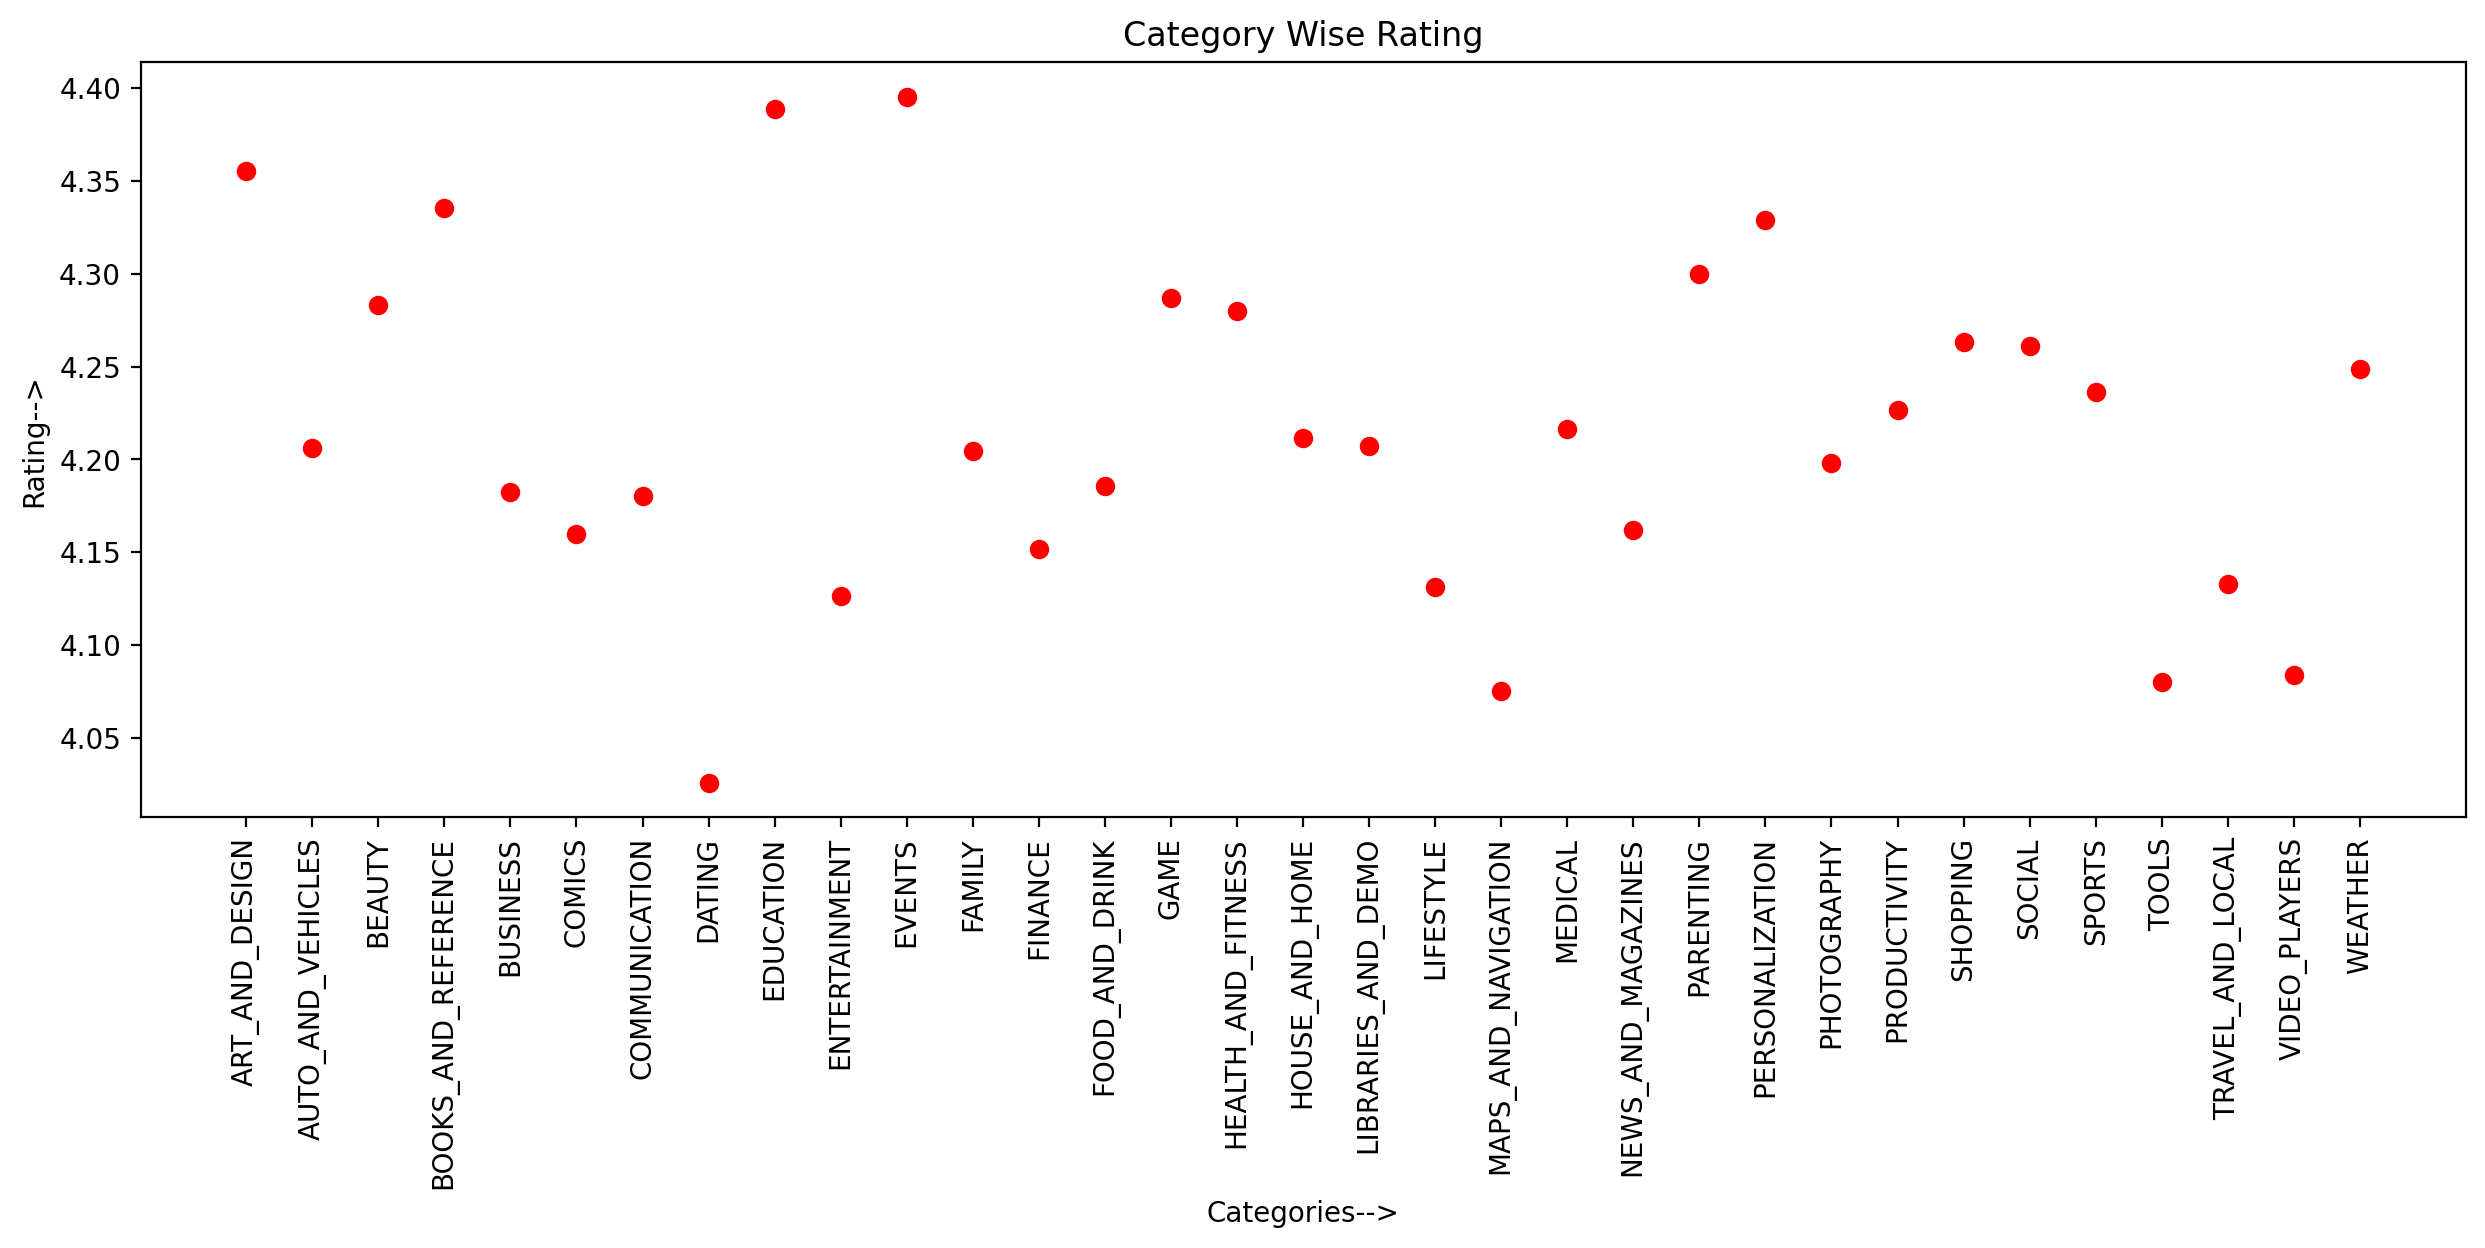

In [56]:
plt.figure(figsize=(15,5),dpi=200) #For Size of Plot
plt.plot(category_df['Rating'],'ro',color='r') #ro-bubles
plt.xticks(rotation=90) #for spacing in x-labels so changed the rotation of xlabels
plt.title('Category Wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Rating-->')
plt.show();

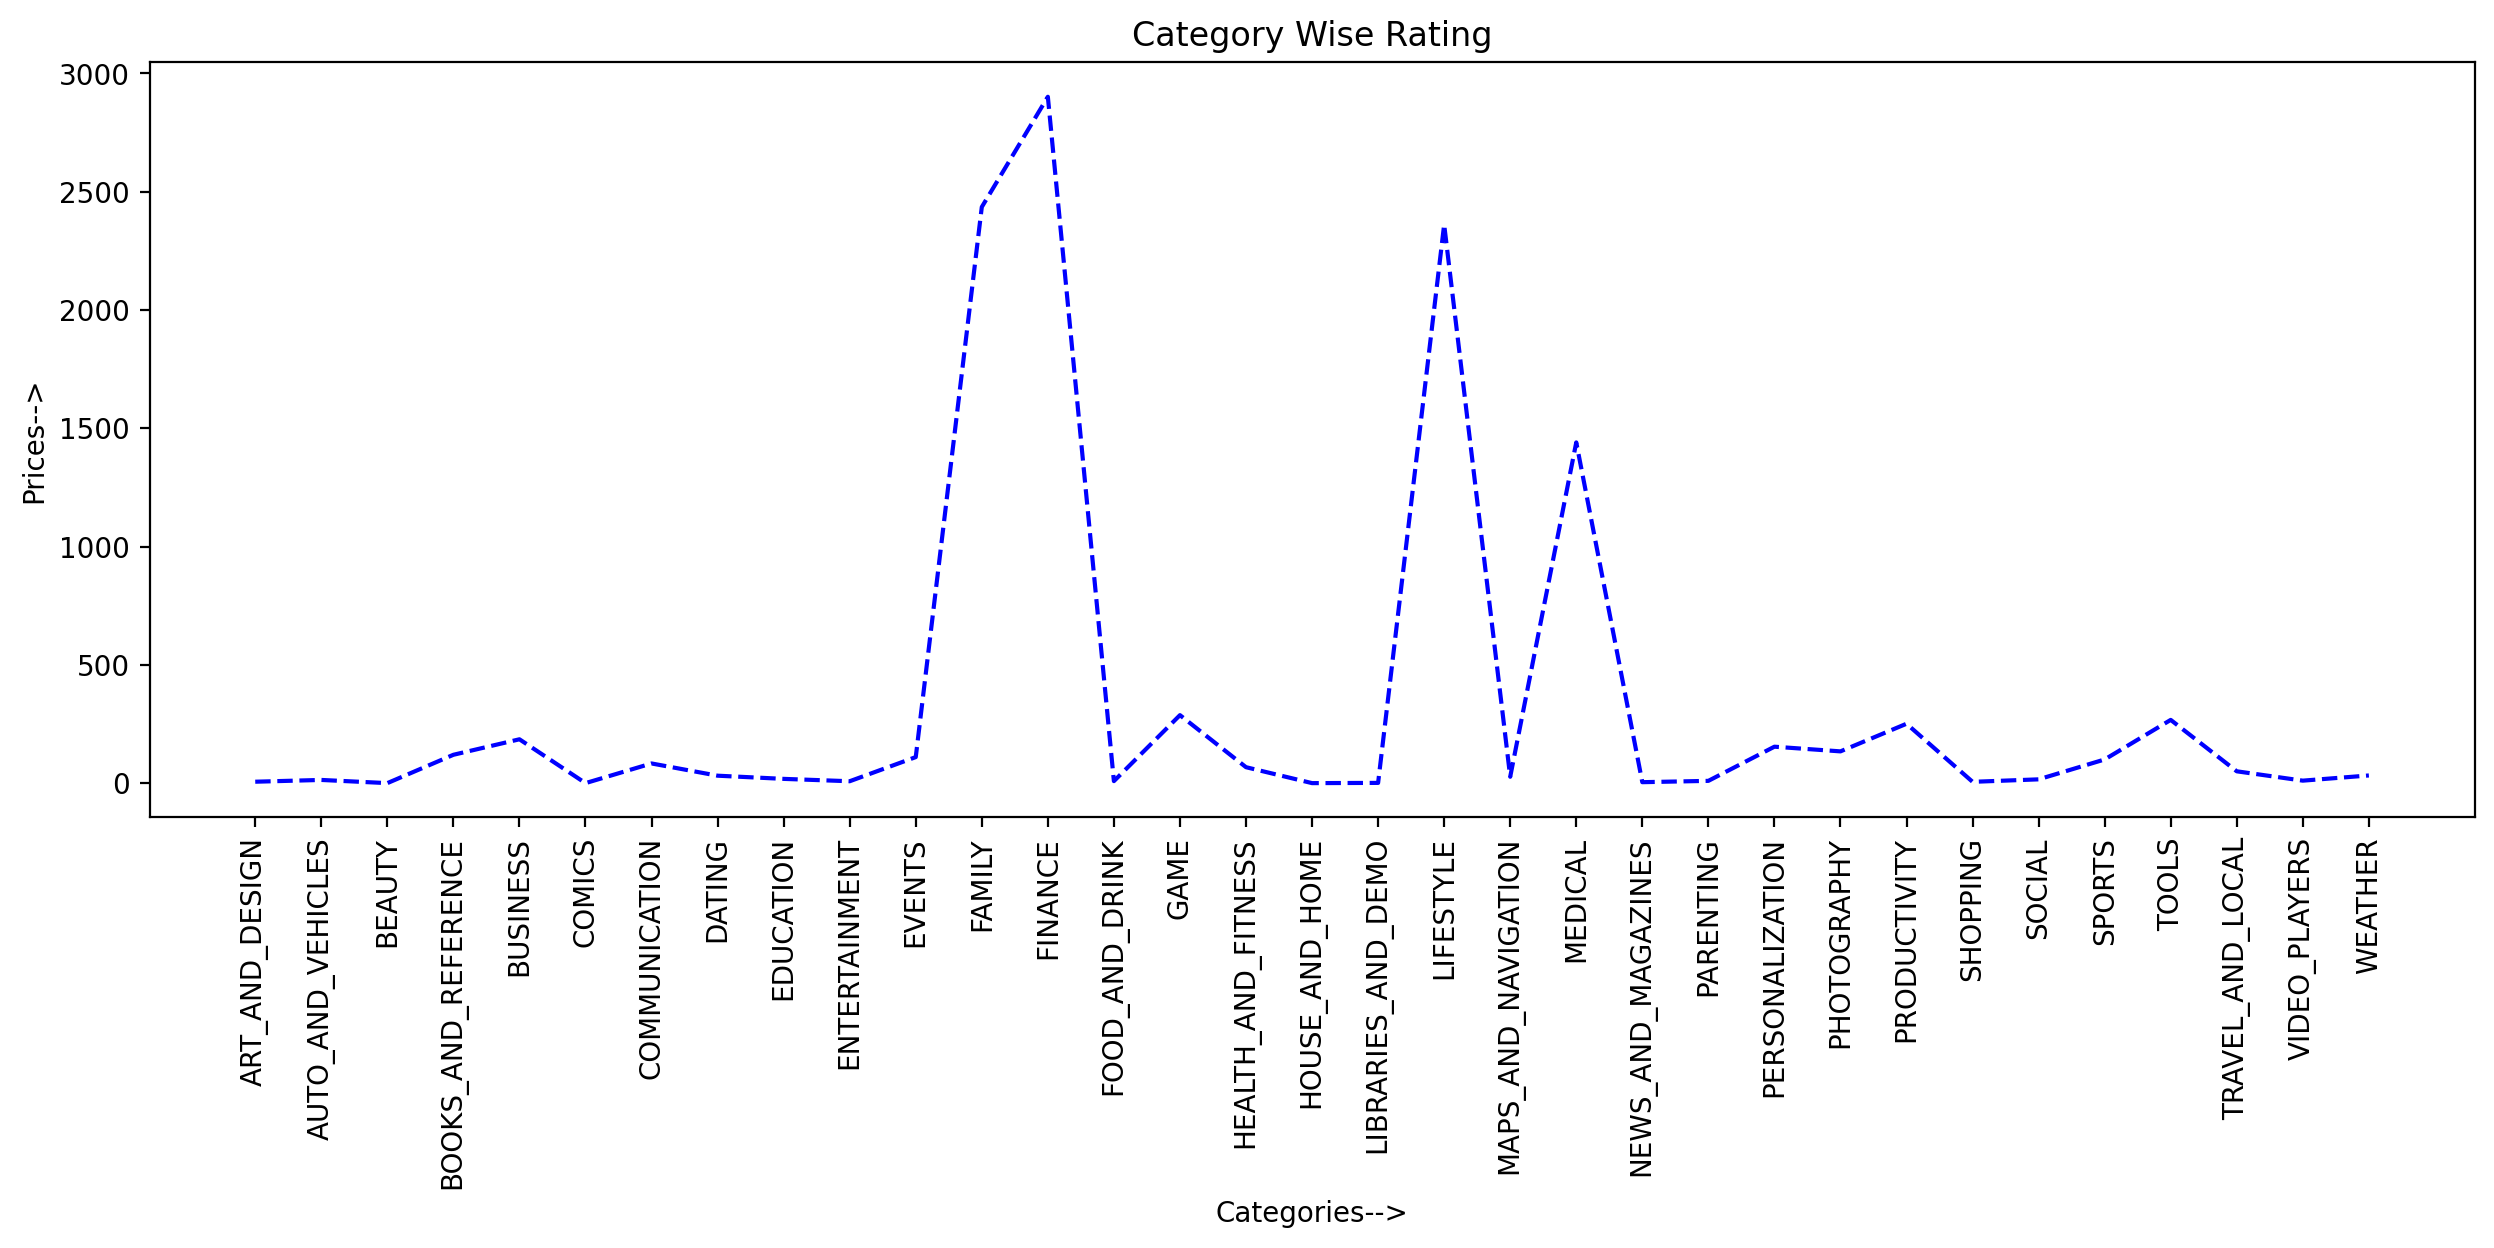

In [57]:
plt.figure(figsize=(15,5),dpi=200) #For Size of Plot
plt.plot(category_df['Price'],'r--',color='b') #ro-bubles
plt.xticks(rotation=90) #for spacing in x-labels so changed the rotation of xlabels
plt.title('Category Wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Prices-->')
plt.show();

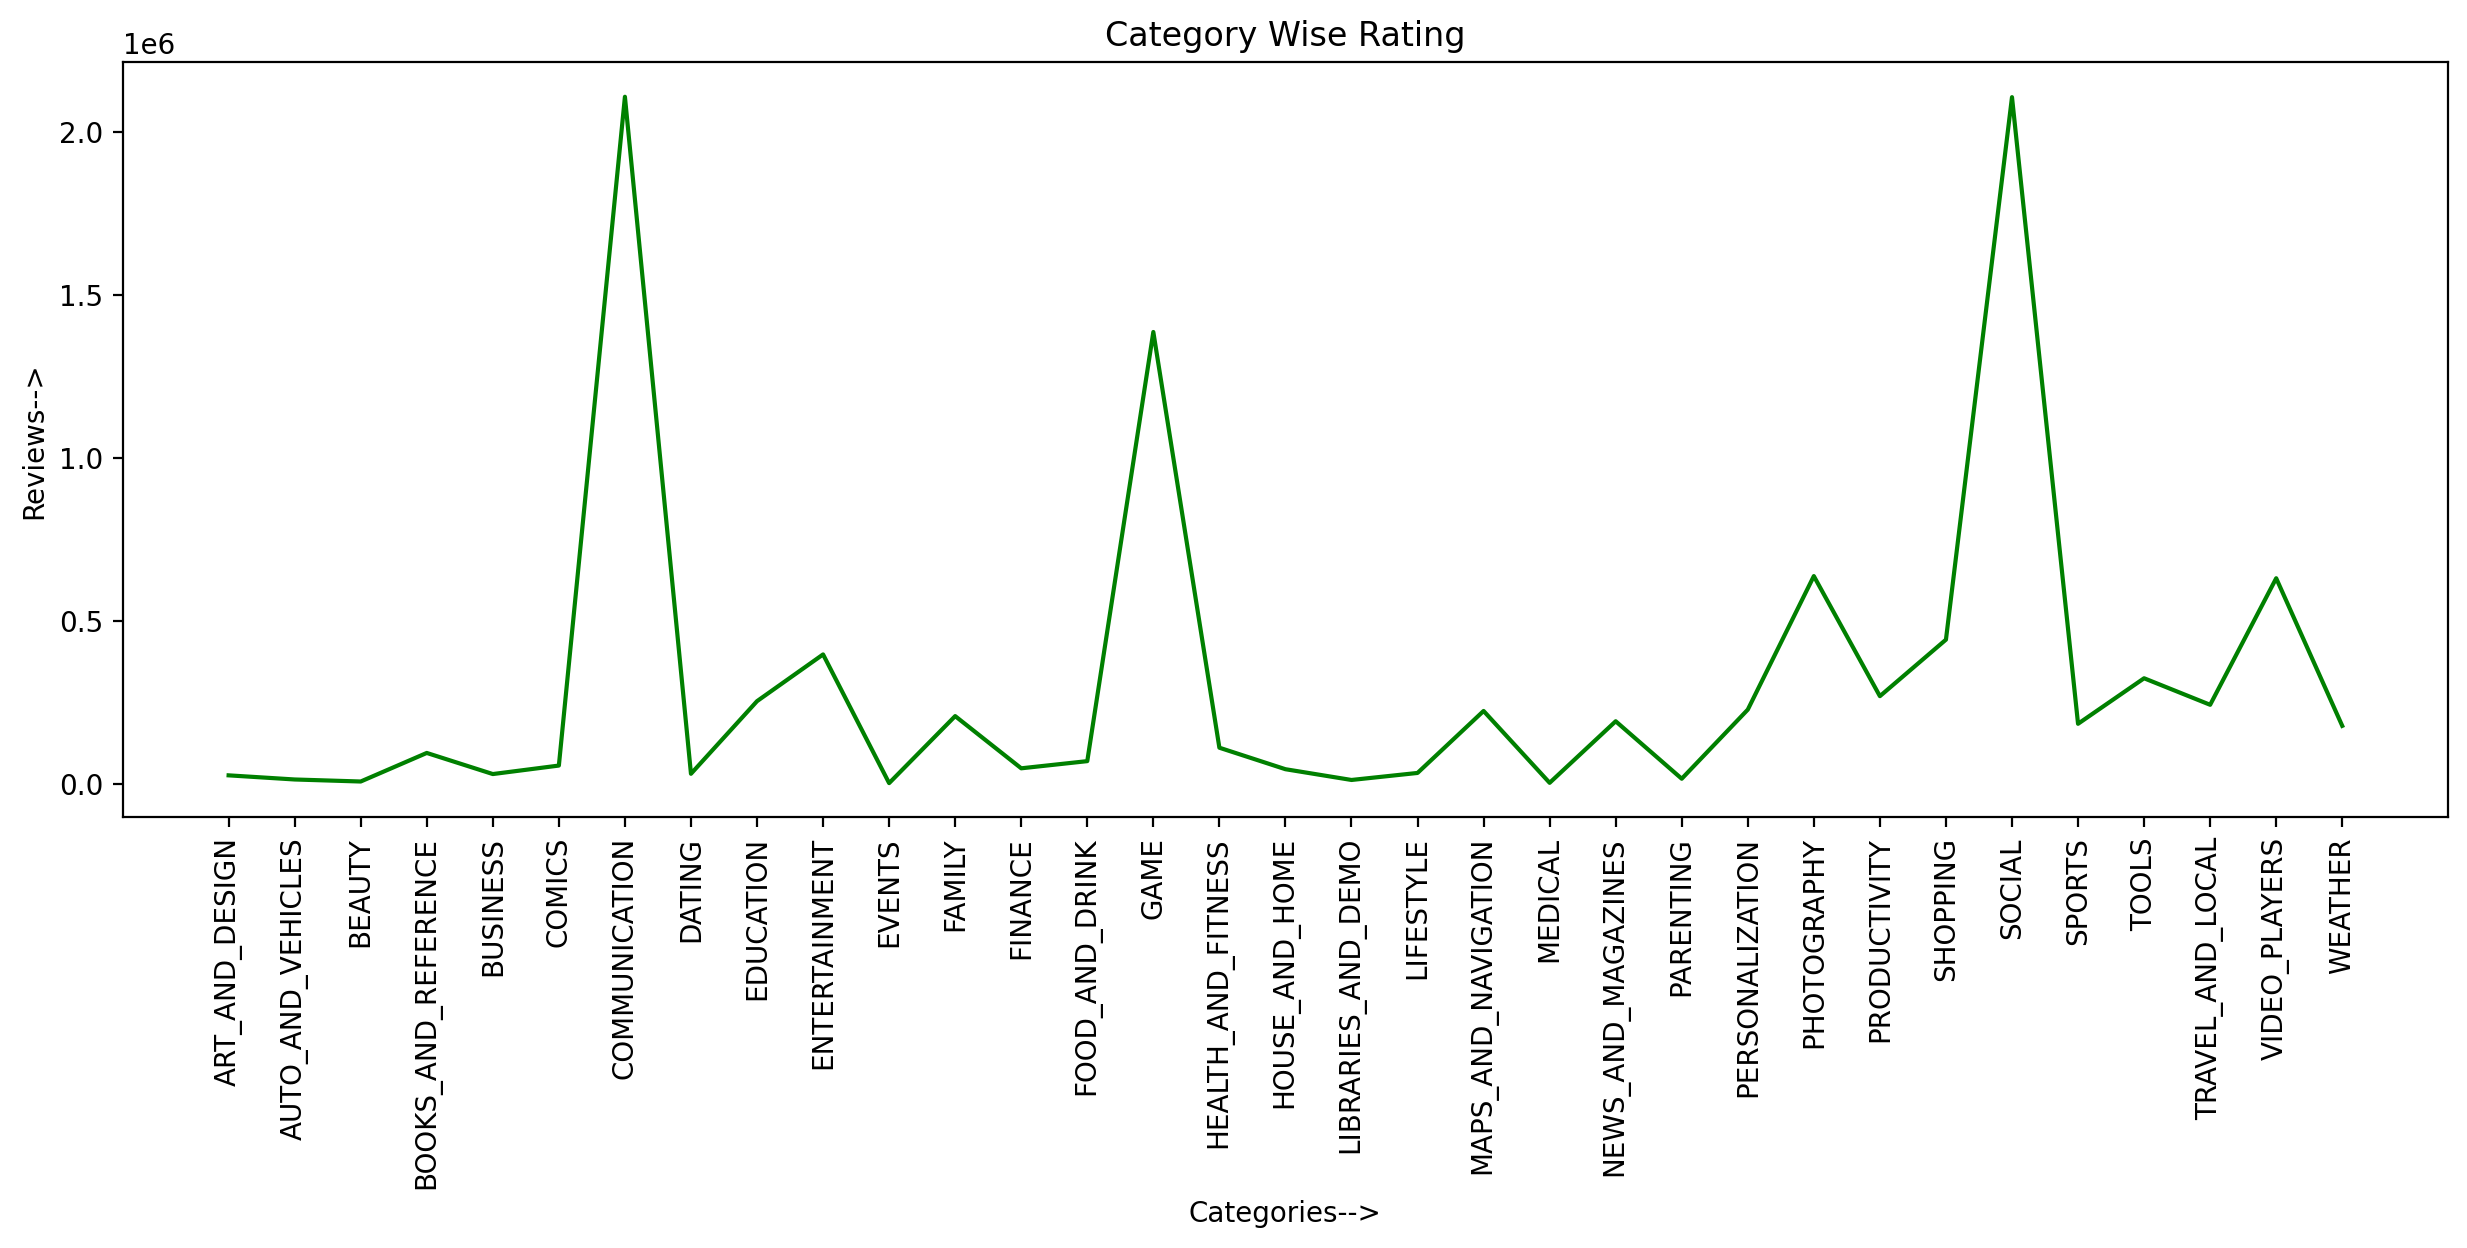

In [58]:
plt.figure(figsize=(15,5),dpi=200) #For Size of Plot
plt.plot(category_df['Reviews'],'g',color='g') #ro-bubles
plt.xticks(rotation=90) #for spacing in x-labels so changed the rotation of xlabels
plt.title('Category Wise Rating')
plt.xlabel('Categories-->')
plt.ylabel('Reviews-->')
plt.show();